Read csv file of all alloys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("SteelDB2.csv")
data.head

<bound method NDFrame.head of      Weld      C    Mn    Si      S      P      Al      Ti    Cr    Ni     Mo  \
0    A3Ni  0.062  0.62  0.29  0.007  0.007  0.0005  0.0006  0.03  3.01  0.005   
1    A3Ni  0.057  0.65  0.30  0.007  0.007  0.0005  0.0036  0.03  3.03  0.005   
2    A3Ni  0.059  0.63  0.31  0.007  0.007  0.0005  0.0082  0.03  3.00  0.005   
3    A3Ni  0.065  0.65  0.35  0.007  0.006  0.0005  0.0150  0.03  3.00  0.005   
4    A3Ni  0.069  0.67  0.39  0.006  0.011  0.0005  0.0220  0.03  2.96  0.005   
..    ...    ...   ...   ...    ...    ...     ...     ...   ...   ...    ...   
958    Ti  0.075  1.75  0.29  0.006  0.005  0.0005  0.0255  0.03  0.03  0.005   
959    Zn  0.069  1.45  0.27  0.010  0.010  0.0006  0.0029  0.03  0.03  0.005   
960    Zn  0.076  1.48  0.31  0.010  0.010  0.0005  0.0027  0.03  0.03  0.005   
961    Zn  0.077  1.43  0.26  0.010  0.010  0.0005  0.0027  0.03  0.03  0.005   
962    Zn  0.076  1.39  0.26  0.010  0.010  0.0005  0.0025  0.03  0.03  0.005  

Drop NA values from Yield strength if they are present

In [2]:
YSdata = data.dropna(axis=0,subset=['YS'])
YSdata["YS"]

0      457
1      477
2      489
3      490
4      533
      ... 
958    588
959    476
960    497
961    483
962    468
Name: YS, Length: 963, dtype: int64

In [3]:
YSdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Weld                     963 non-null    object 
 1   C                        963 non-null    float64
 2   Mn                       963 non-null    float64
 3   Si                       963 non-null    float64
 4   S                        963 non-null    float64
 5   P                        963 non-null    float64
 6   Al                       963 non-null    float64
 7   Ti                       963 non-null    float64
 8   Cr                       963 non-null    float64
 9   Ni                       963 non-null    float64
 10  Mo                       963 non-null    float64
 11  V                        963 non-null    float64
 12  Cu                       963 non-null    float64
 13  YS                       963 non-null    int64  
 14  UTS                      9

Text(0, 0.5, 'Yield strength')

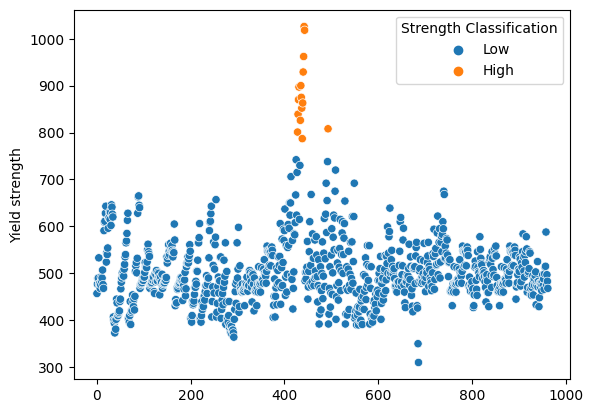

In [4]:
index = YSdata.index.values
values = YSdata['YS'].values
group = YSdata['Strength Classification']
ax = sns.scatterplot(x=index, y=values, hue=group)
ax.set_ylabel("Yield strength")

Maximum Yield strength in the dataset

In [5]:
YSdata['YS'].max()

1026

Maximum Yield strength in the dataset

In [6]:
YSdata['YS'].min()

310

We see that there is a small group of compositions with more than 750 N/mm2 Yield strength while most are in the 400-700 N/mm2 range

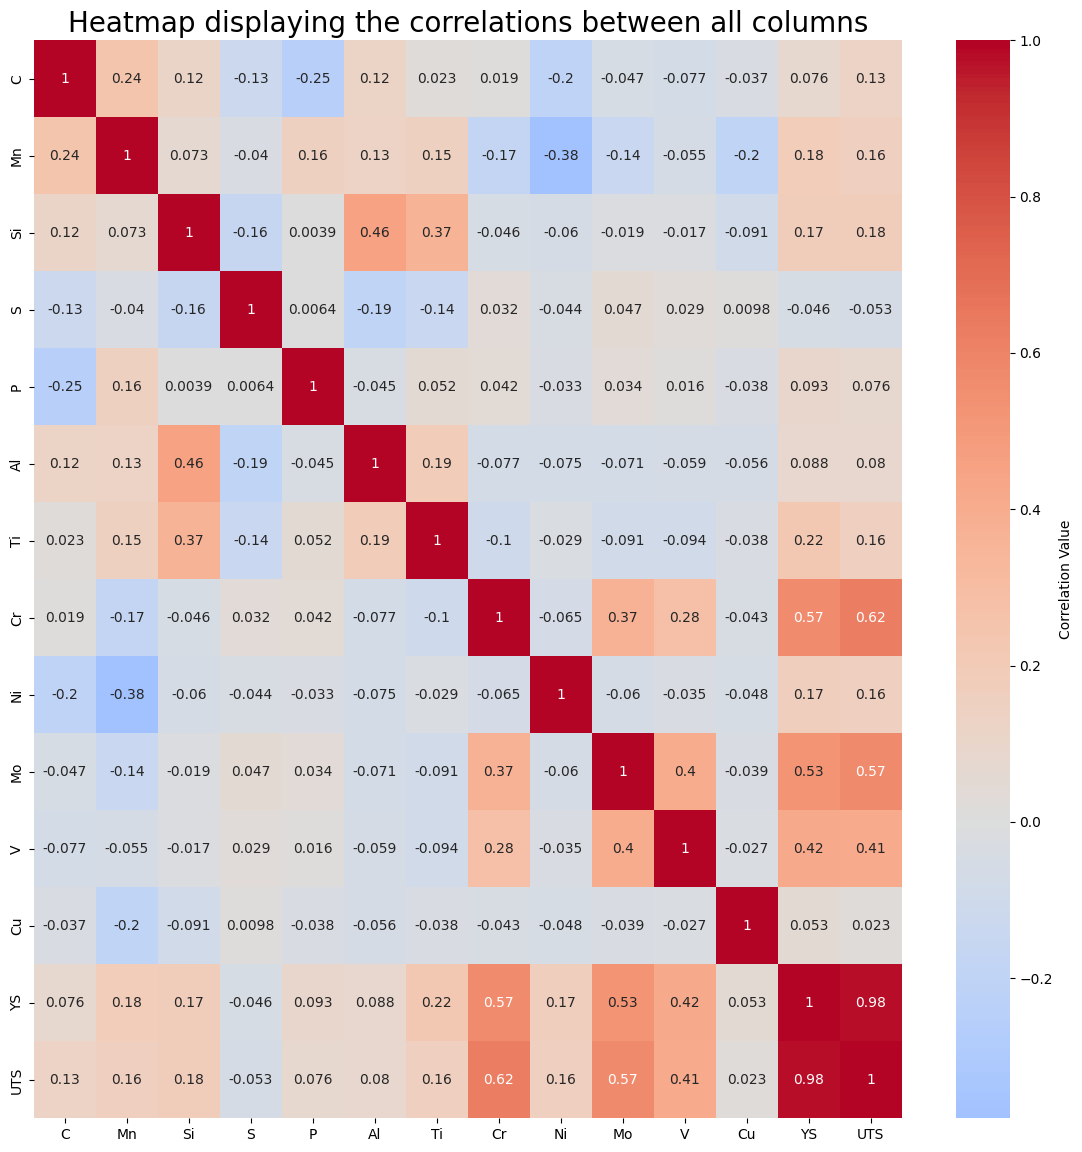

In [7]:
Numdata = YSdata[['C','Mn','Si','S','P','Al','Ti','Cr','Ni','Mo','V','Cu','YS','UTS']]
corr = Numdata.corr()
plt.figure(figsize=(14,14))
plt.title("Heatmap displaying the correlations between all columns", fontsize=20)
sns.heatmap(corr, center=0, annot=True, cmap="coolwarm", cbar_kws={'label': 'Correlation Value'})
plt.show()

There is some correlation between elements and properties like Cr/Mo content increases yield/ultimate strength while S content decreases strength

Put alloying elements in X 2D array

In [8]:
X = Numdata.iloc[:,:12].values
X

array([[0.062, 0.62 , 0.29 , ..., 0.005, 0.005, 0.03 ],
       [0.057, 0.65 , 0.3  , ..., 0.005, 0.005, 0.03 ],
       [0.059, 0.63 , 0.31 , ..., 0.005, 0.005, 0.03 ],
       ...,
       [0.076, 1.48 , 0.31 , ..., 0.005, 0.006, 0.04 ],
       [0.077, 1.43 , 0.26 , ..., 0.005, 0.007, 0.04 ],
       [0.076, 1.39 , 0.26 , ..., 0.005, 0.006, 0.04 ]])

Put Yield strength values in y

In [9]:
y = Numdata['YS'].values

Splitting train and test sets

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=1, test_size=0.20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(770, 12)
(193, 12)
(770,)
(193,)


In [11]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

LINEAR REGRESSION MODEL

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

LRmodel = LinearRegression().fit(X_train, y_train)
y_pred = LRmodel.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('r2 score : {}'.format(r2))
print('mse error : {}'.format(mse))

r2 score : 0.867950267675643
mse error : 1000.4074178785373


Coefficients of linear equation obtained from model

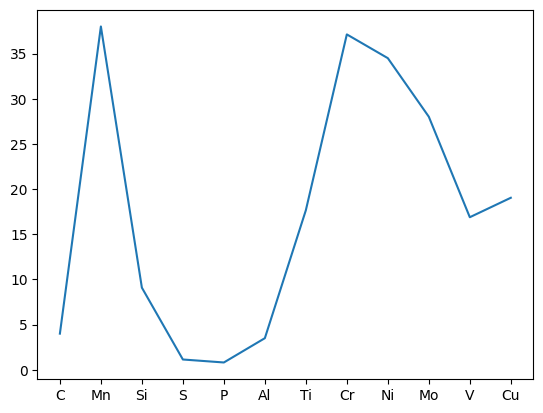

In [13]:
elements = ['C','Mn','Si','S','P','Al','Ti','Cr','Ni','Mo','V','Cu']
plt.plot(elements,LRmodel.coef_)
plt.show()

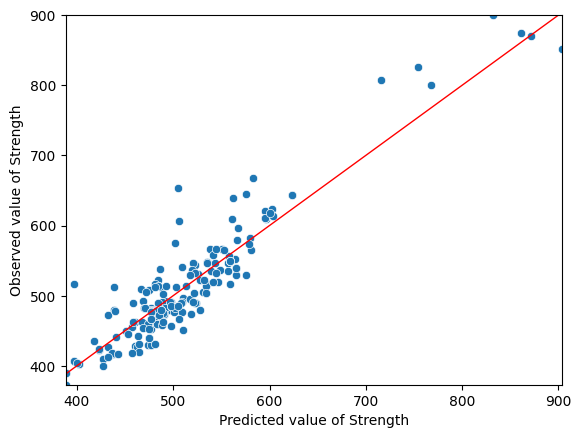

In [14]:
Y_max = y_test.max()
Y_min = y_test.min()
X_max = y_pred.max()
X_min = y_pred.min()

ax = sns.scatterplot(x=y_pred, y=y_test)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(X_min, X_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

Verify distribution of residuals

Text(0, 0.5, 'Residuals')

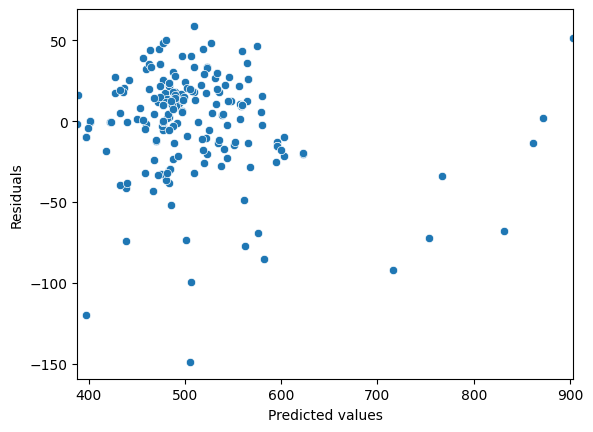

In [15]:
residuals = y_pred-y_test
ax = sns.scatterplot(x=y_pred, y=residuals)
ax.set(xlim=(X_min, X_max))
ax.set_xlabel("Predicted values")
ax.set_ylabel("Residuals")

C:\Users\ajitp\miniconda3\envs\project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

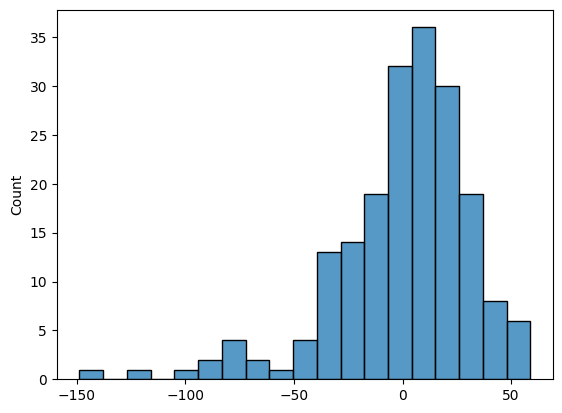

In [16]:
sns.histplot(residuals)

No pattern is seen in Residuals and normal distribution is seen

RANDOM FOREST REGRESSOR

In [17]:
from sklearn.ensemble import RandomForestRegressor

RFmodel = RandomForestRegressor().fit(X_train,y_train)
y_pred= RFmodel.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('r2 score : {}'.format(r2))
print('mse error : {}'.format(mse))

r2 score : 0.9130012926595606
mse error : 659.1013146125533


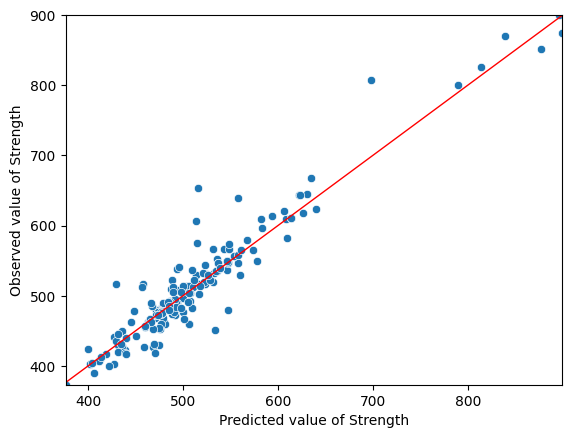

In [18]:
Y_max = y_test.max()
Y_min = y_test.min()
X_max = y_pred.max()
X_min = y_pred.min()

ax = sns.scatterplot(x=y_pred, y=y_test)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(X_min, X_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

Text(0, 0.5, 'Residuals')

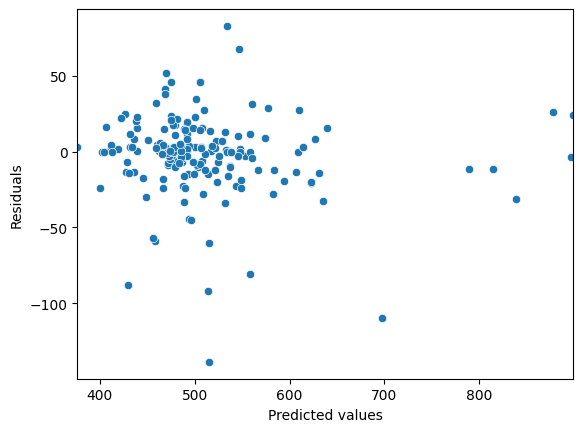

In [19]:
residuals = y_pred-y_test
ax = sns.scatterplot(x=y_pred, y=residuals)
ax.set(xlim=(X_min, X_max))
ax.set_xlabel("Predicted values")
ax.set_ylabel("Residuals")

C:\Users\ajitp\miniconda3\envs\project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

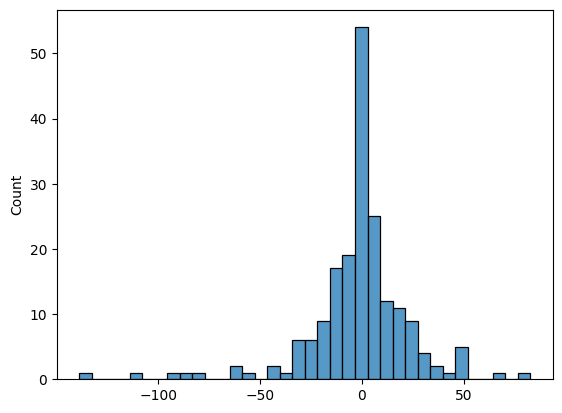

In [20]:
sns.histplot(residuals)

K nearest neighbour hyperparameter optimization using GridSearchCV and KFold cross validation

{'n_neighbors': 3}


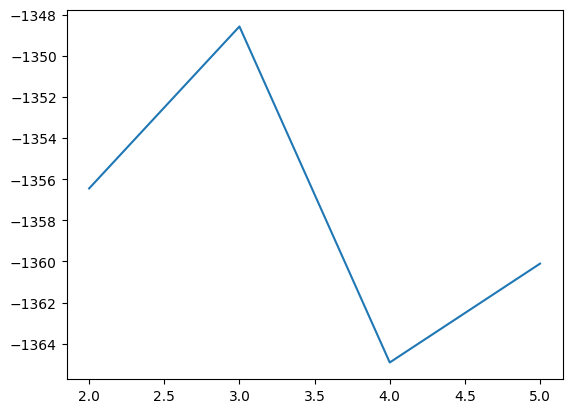

r2 score : 0.8559251614746025
mse error : 1091.509499136442


In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
KNN_params = {
    'n_neighbors': np.arange(2,6)
}
base_model = KNeighborsRegressor()

kf=KFold(n_splits=5,shuffle=True,random_state=42)

KNN_gr = GridSearchCV(base_model,KNN_params,scoring='neg_mean_squared_error',cv=kf)

KNN_gr.fit(X_train, y_train)

print(KNN_gr.best_params_)
#print(KNN_gr.cv_results_)
plt.plot(KNN_params['n_neighbors'],KNN_gr.cv_results_['mean_test_score'])
plt.show()

KNN_best = KNN_gr.best_estimator_
y_pred = KNN_best.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('r2 score : {}'.format(r2))
print('mse error : {}'.format(mse))

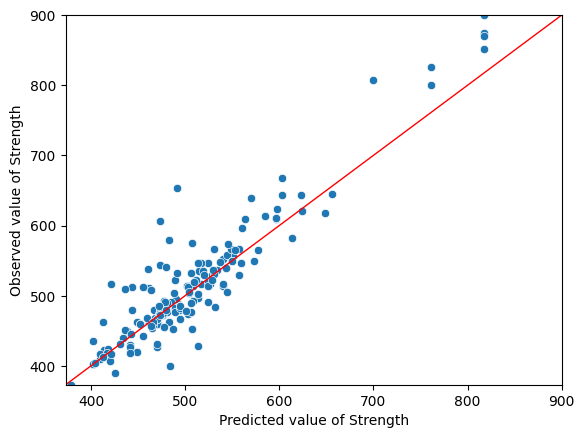

In [22]:
Y_max = y_test.max()
Y_min = y_test.min()

ax = sns.scatterplot(x=y_pred, y=y_test)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

Text(0, 0.5, 'Residuals')

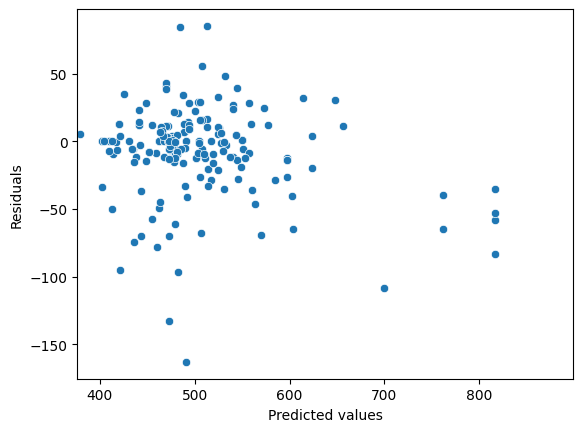

In [23]:
residuals = y_pred-y_test
ax = sns.scatterplot(x=y_pred, y=residuals)
ax.set(xlim=(X_min, X_max))
ax.set_xlabel("Predicted values")
ax.set_ylabel("Residuals")

C:\Users\ajitp\miniconda3\envs\project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

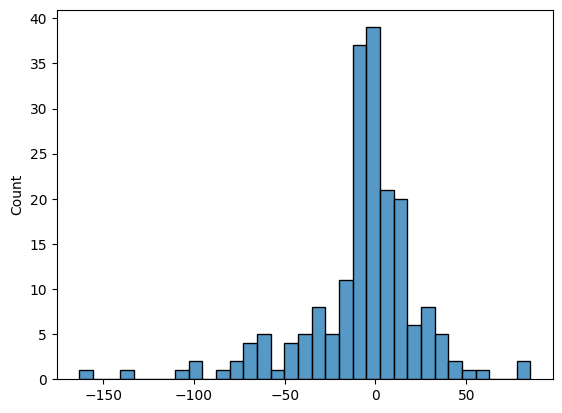

In [24]:
sns.histplot(residuals)

Identify max and min % composition of alloys

In [25]:
X.max(axis=0)

array([0.152, 2.1  , 1.11 , 0.046, 0.04 , 0.068, 0.077, 3.5  , 5.48 ,
       1.16 , 2.873, 2.04 ])

In [26]:
X.min(axis=0)

array([3.5e-02, 2.3e-01, 0.0e+00, 3.0e-03, 3.0e-03, 1.0e-04, 1.0e-04,
       3.0e-02, 3.0e-02, 5.0e-03, 3.0e-03, 2.0e-02])

Create search space based on % compositions present in original data

In [27]:
#3 compositions for each element

element_ranges ={
    "C"  : np.linspace(0.03,0.2,3),
    "Mn"   : np.linspace(0.2,2.5,3),
    "Si"  : np.linspace(0,1.5,3),
    "S"  : np.linspace(0.003,0.1,3),
    "P"   : np.linspace(0.003,0.1,3),
    "Al"  : np.linspace(0.001,0.1,3),
    "Ti"  : np.linspace(0.001,0.15,3),
    "Cr"  : np.linspace(0.03,4,3),
    "Ni"  : np.linspace(0.03,6,3),
    "Mo"  : np.linspace(0.05,1.5,3),
    "V"  : np.linspace(0.03,3,3),
    "Cu"  : np.linspace(0.02,2.5,3),
}

element_ranges

{'C': array([0.03 , 0.115, 0.2  ]),
 'Mn': array([0.2 , 1.35, 2.5 ]),
 'Si': array([0.  , 0.75, 1.5 ]),
 'S': array([0.003 , 0.0515, 0.1   ]),
 'P': array([0.003 , 0.0515, 0.1   ]),
 'Al': array([0.001 , 0.0505, 0.1   ]),
 'Ti': array([0.001 , 0.0755, 0.15  ]),
 'Cr': array([0.03 , 2.015, 4.   ]),
 'Ni': array([0.03 , 3.015, 6.   ]),
 'Mo': array([0.05 , 0.775, 1.5  ]),
 'V': array([0.03 , 1.515, 3.   ]),
 'Cu': array([0.02, 1.26, 2.5 ])}

Create search space dataframe where 4 elements have higher values in each row

In [28]:
from itertools import combinations

def get_compositions(elements,element_ranges_dict,comb):
    #df=[elements]
    df=[]
    for elements_sel in combinations(elements,comb):
        i = 1
        while i<3:
            row=[]
            for elem in elements:
                x = element_ranges_dict[elem]
                if elem in elements_sel:
                    row.append(np.round(x[i],4)) #round to 3 decimal places
                else:
                    row.append(x[0])
            i+=1
            df.append(row)
    DataF = pd.DataFrame(df,columns=elements)
    #DataF = pd.DataFrame(df)
    return(DataF)
                
            

search_space = get_compositions(elements, element_ranges, comb=4)
search_space

,C,Mn,Si,S,P,Al,Ti,Cr,Ni,Mo,V,Cu
0,0.115,1.35,0.75,0.0515,0.0030,0.0010,0.001,0.030,0.030,0.050,0.030,0.02
1,0.200,2.50,1.50,0.1000,0.0030,0.0010,0.001,0.030,0.030,0.050,0.030,0.02
2,0.115,1.35,0.75,0.0030,0.0515,0.0010,0.001,0.030,0.030,0.050,0.030,0.02
3,0.200,2.50,1.50,0.0030,0.1000,0.0010,0.001,0.030,0.030,0.050,0.030,0.02
4,0.115,1.35,0.75,0.0030,0.0030,0.0505,0.001,0.030,0.030,0.050,0.030,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.030,0.20,0.00,0.0030,0.0030,0.0010,0.001,4.000,6.000,0.050,3.000,2.50
986,0.030,0.20,0.00,0.0030,0.0030,0.0010,0.001,2.015,0.030,0.775,1.515,1.26
987,0.030,0.20,0.00,0.0030,0.0030,0.0010,0.001,4.000,0.030,1.500,3.000,2.50
988,0.030,0.20,0.00,0.0030,0.0030,0.0010,0.001,0.030,3.015,0.775,1.515,1.26


Predict Maximum yield strength and corresponding composition using Linear regression model

In [29]:
X_pred = search_space
y_pred= LRmodel.predict(X_pred)
df_pred = pd.DataFrame(y_pred)
df_pred.max(axis=0)

C:\Users\ajitp\miniconda3\envs\project\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0    1007.288708
dtype: float64

Max yield strength as predicted by Linear regression is 1007.29 N/mm2

In [30]:
df_pred[0].idxmax()

553

Composition with max yield strength is shown below

In [31]:
search_space.iloc[[553]]

,C,Mn,Si,S,P,Al,Ti,Cr,Ni,Mo,V,Cu
553,0.03,2.5,0.0,0.003,0.003,0.001,0.001,4.0,6.0,0.05,3.0,0.02


Predict Maximum yield strength and corresponding composition using Random Forest regression model

In [32]:
X_pred = search_space
y_pred= RFmodel.predict(X_pred)
df_pred = pd.DataFrame(y_pred)
df_pred.max(axis=0)

C:\Users\ajitp\miniconda3\envs\project\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


0    683.07
dtype: float64

In [33]:
index = df_pred[0].idxmax()
search_space.iloc[[index]]

,C,Mn,Si,S,P,Al,Ti,Cr,Ni,Mo,V,Cu
653,0.03,0.2,1.5,0.003,0.1,0.001,0.001,4.0,0.03,0.05,3.0,0.02


Predict Maximum yield strength and corresponding composition using KNN regression model

In [34]:
X_pred = search_space
y_pred= KNN_best.predict(X_pred)
df_pred = pd.DataFrame(y_pred)
df_pred.max(axis=0)

C:\Users\ajitp\miniconda3\envs\project\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


0    682.666667
dtype: float64

In [35]:
index = df_pred[0].idxmax()
search_space.iloc[[index]]

,C,Mn,Si,S,P,Al,Ti,Cr,Ni,Mo,V,Cu
387,0.03,2.5,1.5,0.003,0.003,0.001,0.001,4.0,0.03,0.05,3.0,0.02


KNN Regression with limited dataset using strength values more than 600 N/mm2

In [36]:
highstr = []
for index,value in enumerate(Numdata['YS']):
    if value>600:
        highstr.append(index)
X2 = Numdata.iloc[highstr,:12].values
y2 = Numdata['YS'].iloc[highstr].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2 , random_state=1, test_size=0.40)
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
knn_model = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
y_pred= knn_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('r2 score : {}'.format(r2))
print('mse error : {}'.format(mse))

r2 score : 0.8073332016168258
mse error : 2052.4006734006743


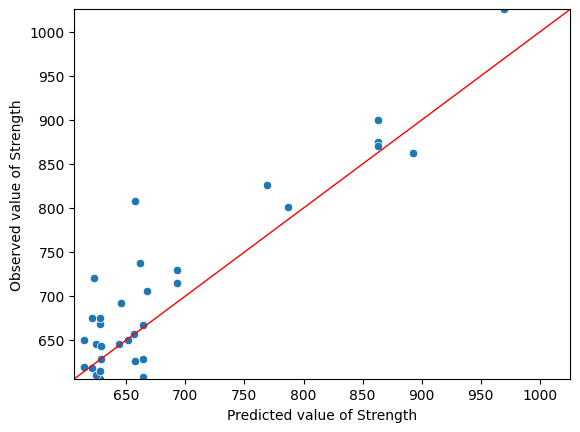

In [39]:
Y_max = y_test.max()
Y_min = y_test.min()

ax = sns.scatterplot(x=y_pred, y=y_test)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

Predict Maximum yield strength and corresponding composition

In [40]:
X_pred = search_space
y_pred= knn_model.predict(X_pred)
df_pred = pd.DataFrame(y_pred)
df_pred.max(axis=0)

C:\Users\ajitp\miniconda3\envs\project\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


0    969.666667
dtype: float64

In [41]:
index = df_pred[0].idxmax()
search_space.iloc[[index]]

,C,Mn,Si,S,P,Al,Ti,Cr,Ni,Mo,V,Cu
75,0.2,2.5,0.0,0.003,0.003,0.001,0.001,4.0,0.03,0.05,3.0,0.02


CLASSIFICATION

Support Vector Classifier

In [42]:
X

array([[0.062, 0.62 , 0.29 , ..., 0.005, 0.005, 0.03 ],
       [0.057, 0.65 , 0.3  , ..., 0.005, 0.005, 0.03 ],
       [0.059, 0.63 , 0.31 , ..., 0.005, 0.005, 0.03 ],
       ...,
       [0.076, 1.48 , 0.31 , ..., 0.005, 0.006, 0.04 ],
       [0.077, 1.43 , 0.26 , ..., 0.005, 0.007, 0.04 ],
       [0.076, 1.39 , 0.26 , ..., 0.005, 0.006, 0.04 ]])

Use stratified split so that proportion of low and high strength is retained

In [43]:
y = YSdata['Strength Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
y_test

36     Low
152    Low
709    Low
203    Low
731    Low
      ... 
189    Low
638    Low
275    Low
176    Low
307    Low
Name: Strength Classification, Length: 289, dtype: object

In [44]:
from sklearn.svm import SVC

ClassModel = SVC(gamma=.1, kernel='rbf', probability=True)
ClassModel.fit(X_train,y_train)

SVC(gamma=0.1, probability=True)

In [45]:
pred=ClassModel.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, pred))

[[  4   1]
 [  0 284]]


              precision    recall  f1-score   support

        High       1.00      0.80      0.89         5
         Low       1.00      1.00      1.00       284

    accuracy                           1.00       289
   macro avg       1.00      0.90      0.94       289
weighted avg       1.00      1.00      1.00       289



Accuracy score is:  0.9965397923875432


In [46]:
X_pred = search_space
pred=ClassModel.predict(X_pred)
index=np.where(pred=='High')
index

C:\Users\ajitp\miniconda3\envs\project\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


(array([  9,  15,  25,  31,  39,  45,  51,  57,  61,  67,  73,  75,  85,
         89, 103, 117, 129, 139, 145, 147, 157, 161, 173, 185, 195, 201,
        203, 213, 217, 227, 237, 243, 245, 255, 259, 267, 273, 275, 285,
        289, 293, 295, 305, 309, 316, 317, 319, 321, 329, 337, 343, 351,
        357, 363, 369, 373, 379, 385, 387, 397, 401, 407, 413, 419, 425,
        429, 435, 441, 443, 453, 457, 461, 467, 471, 477, 483, 485, 495,
        499, 501, 507, 513, 515, 525, 529, 533, 535, 545, 549, 556, 557,
        559, 561, 569, 581, 593, 603, 609, 611, 621, 625, 635, 645, 651,
        653, 663, 667, 675, 681, 683, 693, 697, 701, 703, 713, 717, 724,
        725, 727, 729, 737, 747, 757, 763, 765, 775, 779, 787, 793, 795,
        805, 809, 813, 815, 825, 829, 836, 837, 839, 841, 849, 857, 863,
        865, 875, 879, 883, 885, 895, 899, 906, 907, 909, 911, 919, 923,
        925, 935, 939, 946, 947, 949, 951, 959, 966, 967, 969, 971, 979,
        986, 987], dtype=int64),)

In [47]:
search_space.iloc[index]

,C,Mn,Si,S,P,Al,Ti,Cr,Ni,Mo,V,Cu
9,0.20,2.5,1.5,0.003,0.003,0.001,0.001,4.000,0.03,0.050,0.030,0.02
15,0.20,2.5,1.5,0.003,0.003,0.001,0.001,0.030,0.03,0.050,3.000,0.02
25,0.20,2.5,0.0,0.100,0.003,0.001,0.001,4.000,0.03,0.050,0.030,0.02
31,0.20,2.5,0.0,0.100,0.003,0.001,0.001,0.030,0.03,0.050,3.000,0.02
39,0.20,2.5,0.0,0.003,0.100,0.001,0.001,4.000,0.03,0.050,0.030,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.03,0.2,0.0,0.003,0.003,0.001,0.150,4.000,0.03,1.500,0.030,2.50
971,0.03,0.2,0.0,0.003,0.003,0.001,0.150,4.000,0.03,0.050,3.000,2.50
979,0.03,0.2,0.0,0.003,0.003,0.001,0.150,0.030,0.03,1.500,3.000,2.50
986,0.03,0.2,0.0,0.003,0.003,0.001,0.001,2.015,0.03,0.775,1.515,1.26


171 compositions identified as high strength

Save compositions in CSV file

In [48]:
search_space.iloc[index].to_csv("SVCHighStrength.csv")